In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from PIL import Image
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

tf.random.set_seed(42)


In [3]:
# we load the image data from keras.datasets
(xTrain, yTrain), (xTest, yTest) = mnist.load_data("mnist.npz")

In [4]:
# we need to check the shape of the array
xTrain.shape, yTrain.shape

((60000, 28, 28), (60000,))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

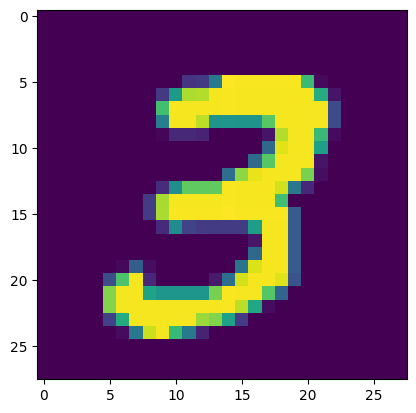

In [25]:
# print some images from this dataset
print(xTrain[7])
plt.imshow(xTrain[7])

In [6]:
# we need to normalize the data to get the highest accuracy
xTrain = xTrain / 255.0
xTest = xTest / 255.0

In [16]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
# compile the model
model.compile(
    loss = tf.losses.SparseCategoricalCrossentropy,
    optimizer = tf.optimizers.Adam(learning_rate = 4.466e-04),
    metrics = ["accuracy"]
)

# we need to fit into the model
model.fit(xTrain, yTrain, epochs=100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step - accuracy: 0.8358 - loss: 0.5575
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9598 - loss: 0.1317
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9733 - loss: 0.0879
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9812 - loss: 0.0637
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9856 - loss: 0.0476
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.9876 - loss: 0.0398
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9890 - loss: 0.0350
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9913 - loss: 0.0276
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9918 - loss: 0.0241
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.9926 - loss: 0.0220
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9942 - loss: 0.0197
Epoch 12/

In [17]:
model.evaluate(xTest, yTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.9756 - loss: 0.2029


[0.17095761001110077, 0.9805999994277954]

In [24]:
sample = np.expand_dims(xTrain[7], axis=0)

out = model.predict(sample)

out = np.squeeze(out)

samplePrediction = np.argmax(out)

print(f"The predicted class is: {samplePrediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The predicted class is: 3
